## Carbon Footprint Optimization in Supply Chain Logistics using Deep Learning and OpenStreetMap

## Install Required Libraries

In [2]:
pip install openrouteservice folium requests

Note: you may need to restart the kernel to use updated packages.


## Import Libraries for Data Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [8]:
# Load the dataset
df = pd.read_csv('indian_logistics_Co2E_Emission.csv')

# Display the first few rows of the dataset
df.head()

,Trip_ID,Origin_City,Origin_State,Origin_Lat,Origin_Lon,Destination_City,Destination_State,Destination_Lat,Destination_Lon,Distance_km,...,Fuel_Unit,Fuel_Type,Vehicle_Type,Temperature_C,Wind_Speed_kmh,Precipitation_mm,Traffic_Congestion,Cargo_Weight_kg,Cargo_Volume_CBM,Carbon_Emissions_kg_CO2
0,1,Coimbatore,Tamil Nadu,11.0168,76.9558,Delhi,Delhi,28.6139,77.2090,2436.97,...,Liters,Diesel,Eicher Pro 2049 (LCV),42.6,22.1,0,High,1175.49,4.17,826.75
1,2,Kolkata,West Bengal,22.5726,88.3639,Delhi,Delhi,28.6139,77.2090,1817.02,...,Liters,Diesel,Eicher Pro 2049 (LCV),43.5,16.7,5,Low,1093.35,9.02,532.60
2,3,Hyderabad,Telangana,17.3850,78.4867,Visakhapatnam,Andhra Pradesh,17.6868,83.2185,436.88,...,Liters,Diesel,Tata Signa 2823.K (HCV),35.6,10.2,0,Medium,14250.32,7.34,425.99
3,4,Bhopal,Madhya Pradesh,23.2599,77.4126,Indore,Madhya Pradesh,22.7196,75.8577,203.44,...,kWh,Electric,Tata Ace EV,32.9,23.0,0,Low,508.61,2.65,0.00
4,5,Visakhapatnam,Andhra Pradesh,17.6868,83.2185,Bhopal,Madhya Pradesh,23.2599,77.4126,670.00,...,Liters,Petrol,Tata Ace,31.5,24.8,0,Low,599.04,3.41,134.30


In [10]:
# Summary statistics of the dataset
df.describe()

,Trip_ID,Origin_Lat,Origin_Lon,Destination_Lat,Destination_Lon,Distance_km,Road_Type_Highway_%,Road_Type_Urban_%,Road_Type_Rural_%,Fuel_Consumed,Temperature_C,Wind_Speed_kmh,Precipitation_mm,Cargo_Weight_kg,Cargo_Volume_CBM,Carbon_Emissions_kg_CO2
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,22.186146,78.077357,22.127533,78.167192,988.986517,66.720000,19.458000,13.822000,171.333100,36.440200,15.169800,3.580000,3132.150140,6.168080,374.400080
std,144.481833,5.119835,4.759006,5.046245,4.545160,547.810625,11.312362,7.589165,10.586144,160.340722,4.912848,5.767498,4.932775,4844.552274,6.889355,452.281527
min,1.000000,11.016800,72.571400,11.016800,72.571400,10.990000,11.000000,10.000000,0.000000,1.750000,28.000000,5.100000,0.000000,103.670000,0.450000,0.000000
25%,125.750000,19.076000,73.856700,19.076000,75.787300,577.357500,58.000000,14.000000,4.000000,66.257500,32.175000,10.300000,0.000000,394.147500,1.787500,78.425000
50%,250.500000,22.572600,77.412600,22.719600,77.453800,927.680000,66.000000,19.000000,13.000000,123.200000,36.800000,15.400000,0.000000,888.455000,3.150000,231.220000
75%,375.250000,26.846700,80.270700,26.846700,80.270700,1311.505000,76.000000,24.000000,22.000000,214.785000,40.850000,20.300000,5.000000,2711.207500,7.345000,493.645000
max,500.000000,30.901000,91.736200,30.901000,91.736200,2493.470000,85.000000,84.000000,38.000000,1063.130000,45.000000,24.800000,15.000000,21943.050000,31.720000,2849.190000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Trip_ID                  500 non-null    int64  
 1   Origin_City              500 non-null    object 
 2   Origin_State             500 non-null    object 
 3   Origin_Lat               500 non-null    float64
 4   Origin_Lon               500 non-null    float64
 5   Destination_City         500 non-null    object 
 6   Destination_State        500 non-null    object 
 7   Destination_Lat          500 non-null    float64
 8   Destination_Lon          500 non-null    float64
 9   Distance_km              500 non-null    float64
 10  Road_Type_Highway_%      500 non-null    int64  
 11  Road_Type_Urban_%        500 non-null    int64  
 12  Road_Type_Rural_%        500 non-null    int64  
 13  Time_of_Day              500 non-null    object 
 14  Day_of_Week              5

In [14]:
# Check for missing values
df.isnull().sum()

Trip_ID                    0
Origin_City                0
Origin_State               0
Origin_Lat                 0
Origin_Lon                 0
Destination_City           0
Destination_State          0
Destination_Lat            0
Destination_Lon            0
Distance_km                0
Road_Type_Highway_%        0
Road_Type_Urban_%          0
Road_Type_Rural_%          0
Time_of_Day                0
Day_of_Week                0
Fuel_Consumed              0
Fuel_Unit                  0
Fuel_Type                  0
Vehicle_Type               0
Temperature_C              0
Wind_Speed_kmh             0
Precipitation_mm           0
Traffic_Congestion         0
Cargo_Weight_kg            0
Cargo_Volume_CBM           0
Carbon_Emissions_kg_CO2    0
dtype: int64

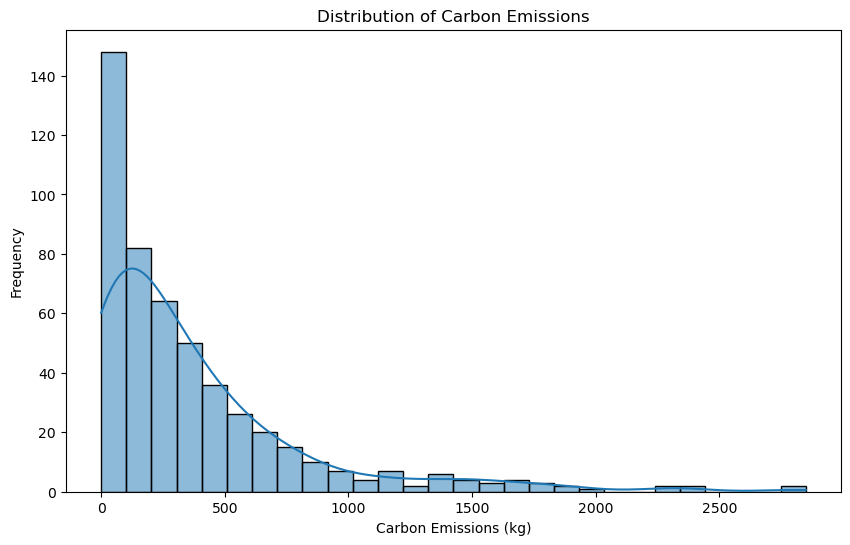

In [16]:
# Distribution of carbon emissions
plt.figure(figsize=(10, 6))
sns.histplot(df['Carbon_Emissions_kg_CO2'], kde=True)
plt.title('Distribution of Carbon Emissions')
plt.xlabel('Carbon Emissions (kg)')
plt.ylabel('Frequency')
plt.show()

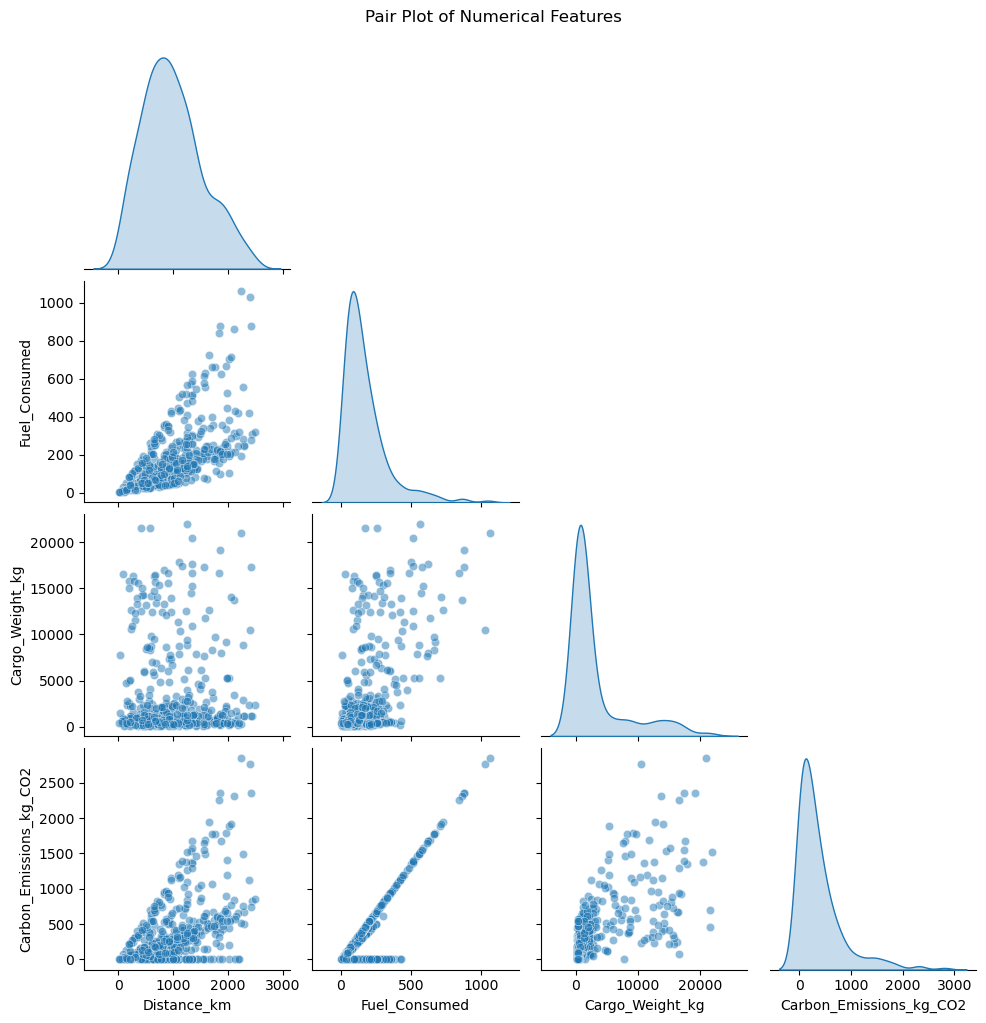

In [22]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Optional: reduce to fewer features if too many
numeric_df = numeric_df[['Distance_km', 'Fuel_Consumed', 'Cargo_Weight_kg', 'Carbon_Emissions_kg_CO2']]

# Create the pair plot
sns.pairplot(numeric_df, corner=True, diag_kind='kde', plot_kws={'alpha':0.5})

# Show plot
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

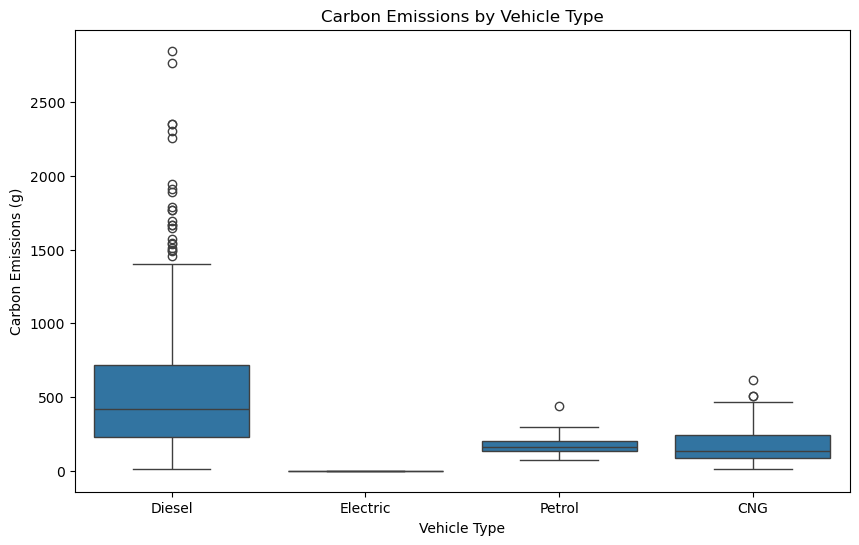

In [26]:
# Carbon emissions by vehicle type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Carbon_Emissions_kg_CO2', data=df)
plt.title('Carbon Emissions by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Carbon Emissions (g)')
plt.show()

## Correlation Analysis

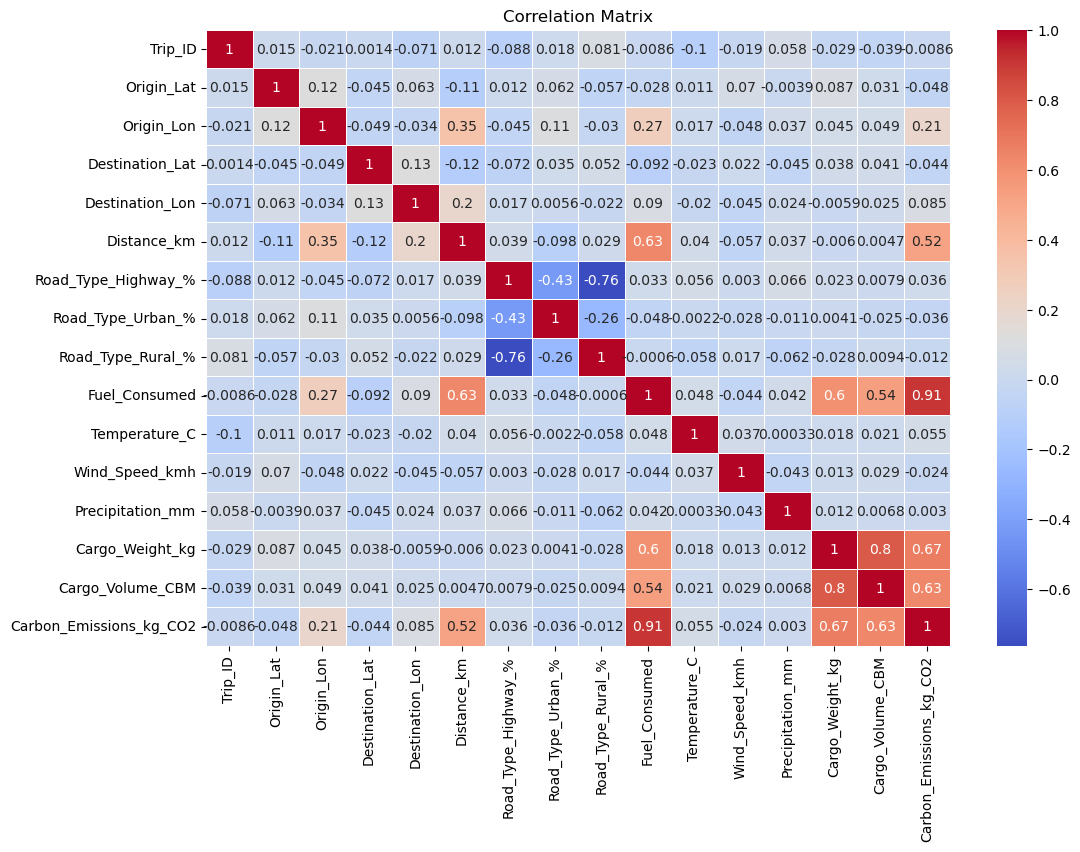

In [29]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Predictive Modeling Using Linear Regression

In [85]:
#Import Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
# Separate target variable
X = df.drop('Carbon_Emissions_kg_CO2', axis=1)
y = df['Carbon_Emissions_kg_CO2']

In [36]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

In [38]:
categorical_features

Index(['Origin_City', 'Origin_State', 'Destination_City', 'Destination_State',
       'Time_of_Day', 'Day_of_Week', 'Fuel_Unit', 'Fuel_Type', 'Vehicle_Type',
       'Traffic_Congestion'],
      dtype='object')

In [40]:
numerical_features

Index(['Trip_ID', 'Origin_Lat', 'Origin_Lon', 'Destination_Lat',
       'Destination_Lon', 'Distance_km', 'Road_Type_Highway_%',
       'Road_Type_Urban_%', 'Road_Type_Rural_%', 'Fuel_Consumed',
       'Temperature_C', 'Wind_Speed_kmh', 'Precipitation_mm',
       'Cargo_Weight_kg', 'Cargo_Volume_CBM'],
      dtype='object')

In [42]:
# Preprocessing pipelines for numerical and categorical features
numerical_transformer = MinMaxScaler() # Normalization
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Encoding

In [44]:
# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [46]:
# Create a preprocessing and training pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

In [48]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Trip_ID', 'Origin_Lat', 'Origin_Lon', 'Destination_Lat',
       'Destination_Lon', 'Distance_km', 'Road_Type_Highway_%',
       'Road_Type_Urban_%', 'Road_Type_Rural_%', 'Fuel_Consumed',
       'Temperature_C', 'Wind_Speed_kmh', 'Precipitation_mm',
       'Cargo_Weight_kg', 'Cargo_Volume_CBM'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Origin_City', 'Origin_State', 'Destination_City', 'Destination_State',
       'Time_of_Day', 'Day_of_Week', 'Fuel_Unit', 'Fuel_Type', 'Vehicle_Type',
       'Traffic_Congestion'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([ 496.78214337, 1656.75600605,  221.37968067, 1655.12435392,
        185.99233884,  206.22679934,  262.57433765,   18.95243766,
       1252.09306685, -263.15822866,  662.2595476 ,   53.2720338 ,
          9.27432868, 1688.83666213,  624.20790034,  212.07793579,
        306.53879585,  135.73269587,  362.03163893,  278.60637925,
       2743.31756298,  872.98573364,  303.51751867, 1366.05587516,
         73.55655115,   72.13412524,   72.49737461,  -50.69886103,
        135.99531036, 1305.84313045,  227.41668626,  297.42391802,
        123.26994678,  182.059801  ,  464.14959998,  655.00296606,
        344.99839674,  302.01371016,   37.92949406,  306.49797325,
       -231.55443938,  232.24823706,  161.86152039,  231.55531946,
        460.18369237, -137.43441605,  683.59954958,  110.48289331,
        178.0850057 ,  254.53164325,  243.04290245,  126.36571792,
        452.38949077,  352.9386957 ,  172.47658277,  260.30086151,
        116.51299559,  397.94632655,   94.45415024, 1123.30383

In [52]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Adding a small epsilon to avoid division by zero for percentage error
mask =y_test != 0
percent_error = np.mean(np.abs((y_test[mask] - y_pred[mask]) / (y_test[mask] ))) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Percentage Error: {percent_error:.2f}%")

Mean Absolute Error (MAE): 67.01
Root Mean Squared Error (RMSE): 95.00
Percentage Error: 33.86%


## Deep Learning Model - Multilayer Perceptron or MLP using Keras from the TensorFlow library.

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib
import folium

In [69]:
# Target variable
target = 'Carbon_Emissions_kg_CO2'


In [71]:
# Separate features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Remove ID and target from features
if 'Trip_ID' in numerical_cols: numerical_cols.remove('Trip_ID')
if target in numerical_cols: numerical_cols.remove(target)

X = df.drop(columns=['Trip_ID', target])
y = df[target]

In [77]:
# Preprocessing: scaling and encoding
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [79]:
# Save preprocessor for future use
joblib.dump(preprocessor, 'preprocessor.pkl')



['preprocessor.pkl']

In [91]:
# Model Training
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_proc.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train_proc, y_train, validation_split=0.1, epochs=50, batch_size=16, verbose=1)

# Save model
model.save("carbon_model.keras")

C:\Users\pravi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 342793.0312 - mae: 365.7692 - val_loss: 256366.5312 - val_mae: 326.8303
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 353990.3438 - mae: 388.7803 - val_loss: 254333.1250 - val_mae: 324.6671
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 309230.1250 - mae: 354.9102 - val_loss: 249677.2969 - val_mae: 319.8011
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 291560.1875 - mae: 336.0677 - val_loss: 240245.7188 - val_mae: 309.6691
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 370235.5625 - mae: 377.6926 - val_loss: 223310.7188 - val_mae: 290.6661
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 222847.0625 - mae: 292.2898 - val_loss: 198823.6562 - val_mae: 261.6240
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 245473.6562 - mae: 289.9560 - val_loss: 165497.0781 - val_mae: 225.9324
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 159321.7812 - mae: 238.8

In [93]:
# Model Evaluation
y_pred = model.predict(X_test_proc).flatten()
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mask =y_test != 0
percent_error = np.mean(np.abs((y_test[mask] - y_pred[mask]) / (y_test[mask] ))) * 100

print(f"MAE: {mae:.2f} kg CO2")
print(f"RMSE: {rmse:.2f} kg CO2")
print(f"R² Score: {r2:.2f}")
print(f"% Error: {percent_error:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
MAE: 62.17 kg CO2
RMSE: 100.44 kg CO2
R² Score: 0.96
% Error: 28.22%


In [114]:
y_pred

array([ 697.6766   , 1743.0455   ,  188.26802  , 1552.2734   ,
         21.367811 ,   95.949745 ,  175.96141  ,   -9.62009  ,
       1064.7284   ,  -14.749051 ,  632.21204  ,   68.521095 ,
         52.161873 , 1595.527    ,  683.28735  ,  123.67177  ,
        217.52394  ,   83.5704   ,  368.28088  ,  159.0049   ,
       2256.4004   ,  846.8335   ,  260.46872  , 1457.5125   ,
         48.397392 ,  232.14737  ,   17.685488 ,  -10.622661 ,
        -16.016922 , 1397.965    ,  283.255    ,  212.9634   ,
        -15.697549 ,  282.26904  ,  493.60974  ,  850.157    ,
        564.3546   ,  283.18295  ,  -14.721664 ,  227.17723  ,
        -12.583479 ,  -12.808489 ,  274.23395  ,  140.8239   ,
        510.66385  ,  -12.78672  ,  877.0416   ,  105.5727   ,
        180.67815  ,   72.54975  ,  148.49724  ,   74.764534 ,
        551.75635  ,  236.34279  ,   -2.3455935,  206.51826  ,
         90.91247  ,  489.66568  ,   65.26301  , 1145.8103   ,
         44.17267  ,  -13.558541 ,  -16.582268 ,  377.5

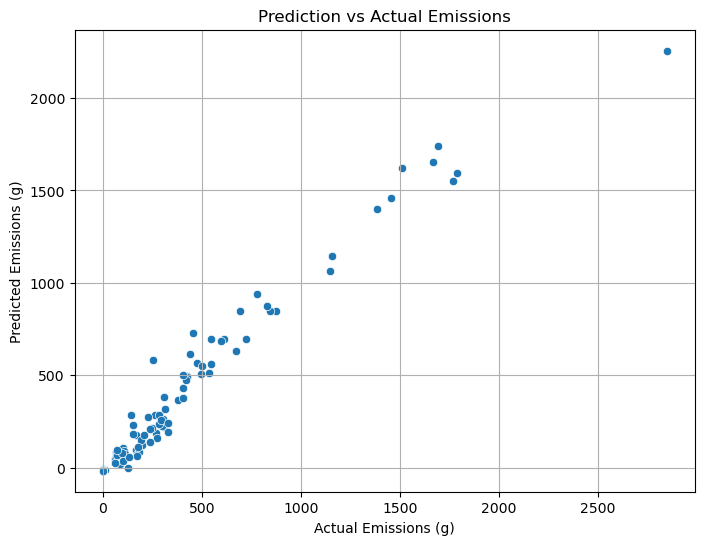

In [116]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Emissions (g)')
plt.ylabel('Predicted Emissions (g)')
plt.title('Prediction vs Actual Emissions')
plt.grid(True)
plt.show()

## Map and Weather API Intergration

In [96]:
import openrouteservice
from openrouteservice import convert
import requests

In [98]:
# Write down API keys
ORS_API_KEY = '5b3ce3597851110001cf624888eb45acf00447ebb0c080ff18c0d75c'
OWM_API_KEY = 'c4c508c0a6f7c49f628c649252a75806'
client = openrouteservice.Client(key=ORS_API_KEY)

In [100]:
origin_coords = (76.9558, 11.0168)        # Sample from dataset
destination_coords = (77.209, 28.6139)



In [102]:
routes = client.directions(coordinates=[origin_coords, destination_coords], profile='driving-car', format='geojson')
distance_km = routes['features'][0]['properties']['segments'][0]['distance'] / 1000
duration = routes['features'][0]['properties']['segments'][0]['duration'] / 60
geometry = routes['features'][0]['geometry']

lat, lon = origin_coords[1], origin_coords[0]
weather_url = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={OWM_API_KEY}&units=metric"
response = requests.get(weather_url).json()
weather_main = response['weather'][0]['main']

weather_map_api = {
    'Clear': 'Clear',
    'Clouds': 'Foggy',
    'Rain': 'Rainy',
    'Drizzle': 'Rainy',
    'Thunderstorm': 'Rainy',
    'Snow': 'Snowy',
    'Mist': 'Foggy',
    'Haze': 'Foggy'
}
weather_condition = weather_map_api.get(weather_main, 'Clear')
traffic_level = 'heavy'
print(f"Weather: {weather_condition}, Distance: {distance_km:.2f} km, Duration: {duration:.2f} min")

Weather: Foggy, Distance: 2313.66 km, Duration: 1722.34 min


In [120]:
pip install geopy

In [122]:
from tensorflow.keras.models import load_model

In [124]:
# Load model and preprocessor
model = load_model("carbon_model.keras")
preprocessor = joblib.load("preprocessor.pkl")

#### Create Function to predict CO2 EMission based on Input values and API 

In [157]:
def predict_emissions_from_coords(
    origin_lat, origin_lon, dest_lat, dest_lon,
    cargo_weight=2000, fuel_used=250,
    vehicle_type="Truck", fuel_type="Diesel",
    traffic="Moderate", road_type="Highway", weather="Clear",
    ors_api_key="YOUR_ORS_API_KEY"
):
    # 1. Get Distance using ORS API
    client = openrouteservice.Client(key=ors_api_key)
    coords = ((origin_lon, origin_lat), (dest_lon, dest_lat))

    try:
        route = client.directions(coords, profile='driving-car', format='geojson')
        distance_km = route['features'][0]['properties']['segments'][0]['distance'] / 1000
    except Exception as e:
        print(f"OpenRouteService API error: {e}")
        return None

    # 2. Create full feature set expected by preprocessor
    input_data = pd.DataFrame([{
        # Raw input values
        'Distance_km': distance_km,
        'Fuel_Used_Liters': fuel_used,
        'Fuel_Consumed': fuel_used,
        'Cargo_Weight_kg': cargo_weight,
        'Cargo_Volume_CBM': 10.0,
        'Vehicle_Type': vehicle_type,
        'Fuel_Type': fuel_type,
        'Traffic_Level': traffic,
        'Traffic_Congestion': traffic,
        'Weather': weather,
        'Temperature_C': 25.0,
        'Precipitation_mm': 0.0,
        'Wind_Speed_kmh': 5.0,
        'Time_of_Day': 'Afternoon',
        'Day_of_Week': 'Monday',
        'Road_Type': road_type,
        'Road_Type_Highway_%': 60,
        'Road_Type_Urban_%': 25,
        'Road_Type_Rural_%': 15,
        'Fuel_Unit': 'Liters',
        'Origin_City': 'Mumbai',
        'Origin_State': 'Maharashtra',
        'Destination_City': 'Delhi',
        'Destination_State': 'Delhi',
        'Origin_Lat': origin_lat,
        'Origin_Lon': origin_lon,
        'Destination_Lat': dest_lat,
        'Destination_Lon': dest_lon
    }])

    # 3. Preprocess input
    try:
        input_proc = preprocessor.transform(input_data)
    except Exception as e:
        print(f"Preprocessing error: {e}")
        return None

    # 4. Predict
    emission = model.predict(input_proc)
    return round(emission[0][0], 2)

#### Call Function and Predict Emission based on Input 

In [159]:
emission = predict_emissions_from_coords(
    origin_lat=19.0760, origin_lon=72.8777,   # Mumbai
    dest_lat=28.6139, dest_lon=77.2090,       # Delhi
    ors_api_key= '5b3ce3597851110001cf624888eb45acf00447ebb0c080ff18c0d75c'
)

print(f"Estimated CO₂ Emission: {emission} kg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Estimated CO₂ Emission: 422.95001220703125 kg


## CO2 Emission based on route

In [166]:
start_coords = [df['Origin_Lat'][0], df['Origin_Lon'][0]]
end_coords = [df['Destination_Lat'][0], df['Destination_Lon'][0]]

m = folium.Map(location=start_coords, zoom_start=6)

# Loop through each delivery record
for idx, row in df.iterrows():
    start = [row['Origin_Lat'], row['Origin_Lon']]
    end = [row['Destination_Lat'], row['Destination_Lon']]
    emission = row.get('Carbon_Emissions_kg_CO2', None)

    # Color code based on emission if available
    if emission is not None:
        color = "green" if emission < 100 else "orange" if emission < 400 else "red"
        tooltip = f"Emission: {emission:.2f} kg"
    else:
        color = "blue"
        tooltip = f"Route #{idx+1}"

    # Add markers and polyline
    folium.Marker(start, tooltip="Start", icon=folium.Icon(color="green")).add_to(m)
    folium.Marker(end, tooltip="End", icon=folium.Icon(color="red")).add_to(m)
    folium.PolyLine([start, end], color=color, weight=3, tooltip=tooltip).add_to(m)

# Display map (Jupyter)
m